In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Stochastic Methods

To better show the potential of stochastic optimizers with accelerators we perform a linear regression with his regularized version through a perceptron or single layer neural network. This problem, aka least squares problem, can be formalized as follows:

$$\min_\theta \sum_{i=1}^m(y^{(i)} - x_i^T\theta)^2$$

which change as follow if we introduce some L2 regulrization:

$$\min_{\theta_{ridge}} \sum_{i=1}^m(y^{(i)} - x_i^T\theta_{ridge})^2 + \lambda \sum_{j=1}^{n}\theta_{{ridge}_{j}}^{2}$$

In [2]:
import numpy as np

from optiml.ml.utils import generate_centred_and_normalized_regression_data
from optiml.ml.neural_network import NeuralNetworkRegressor
from optiml.ml.neural_network.layers import FullyConnected
from optiml.ml.neural_network.activations import linear
from optiml.ml.neural_network.losses import mean_squared_error
from optiml.ml.neural_network.regularizers import L2

from optiml.optimization.utils import plot_trajectory_optimization
from optiml.optimization.unconstrained.stochastic import *

X, y = generate_centred_and_normalized_regression_data(random_state=1)

The closed solution to linear regression is:

$$\theta^* = (X^TX)^{-1} X^T Y$$

which change as follow if we introduce some L2 regularization:

$$\theta^*_{ridge} = (X^TX + \lambda I)^{-1} X^T Y$$

In [3]:
lmbda = 10

In [4]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([ 14.9704812 , -17.19468595])

In [5]:
np.linalg.inv(X.T.dot(X) + np.identity(X.shape[1]) * lmbda).dot(X.T).dot(y)

array([-0.1320119 , -0.23377374])

## Stochastic Gradient Descent

epoch	iter	cost		gap		rate
   0	   0	1.7639e-01	6.4672e-02			loss: 1.7639e-01 - r2: 0.7921
 100	 100	1.3634e-01	2.4619e-02	3.8068e-01	loss: 1.3634e-01 - r2: 0.7921
 200	 200	1.2031e-01	8.5861e-03	3.4875e-01	loss: 1.2031e-01 - r2: 0.7921
 300	 300	1.1471e-01	2.9944e-03	3.4875e-01	loss: 1.1471e-01 - r2: 0.7921
 400	 400	1.1276e-01	1.0443e-03	3.4875e-01	loss: 1.1276e-01 - r2: 0.7921
 500	 500	1.1208e-01	3.6420e-04	3.4875e-01	loss: 1.1208e-01 - r2: 0.7921
 600	 600	1.1185e-01	1.2702e-04	3.4875e-01	loss: 1.1185e-01 - r2: 0.7921
 700	 700	1.1176e-01	4.4297e-05	3.4875e-01	loss: 1.1176e-01 - r2: 0.7921
 800	 800	1.1173e-01	1.5449e-05	3.4875e-01	loss: 1.1173e-01 - r2: 0.7921
 900	 900	1.1172e-01	5.3877e-06	3.4875e-01	loss: 1.1172e-01 - r2: 0.7921

[ 14.93180412 -17.15600888]


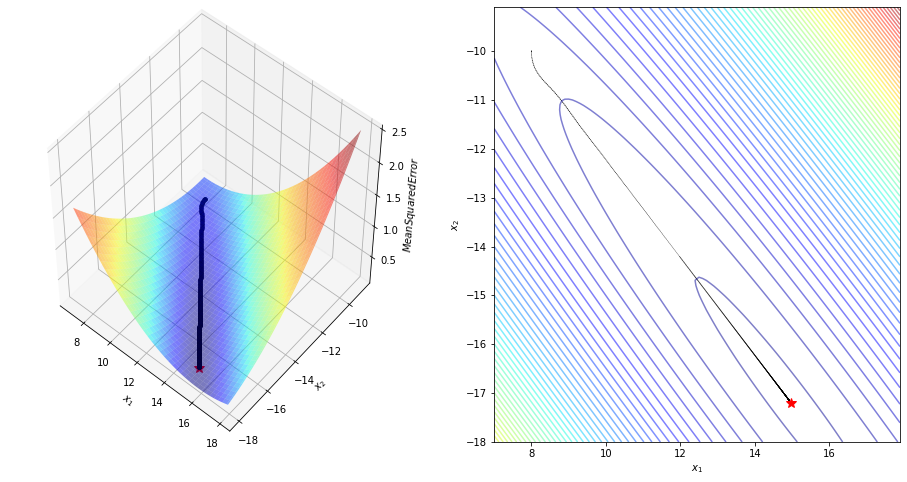

In [6]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, 
                             learning_rate=0.8, momentum_type='nesterov', momentum=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	cost		gap		rate
   0	   0	3.3019e+01	3.2499e+01			loss: 3.3019e+01 - r2: 0.0586
 100	 100	5.2404e-01	3.6477e-03	1.1224e-04	loss: 5.2404e-01 - r2: 0.0586
 200	 200	5.2397e-01	3.5770e-03	9.8063e-01	loss: 5.2397e-01 - r2: 0.0586
 300	 300	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 400	 400	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 500	 500	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 600	 600	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 700	 700	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 800	 800	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 900	 900	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586

[-0.07415885 -0.12512038]


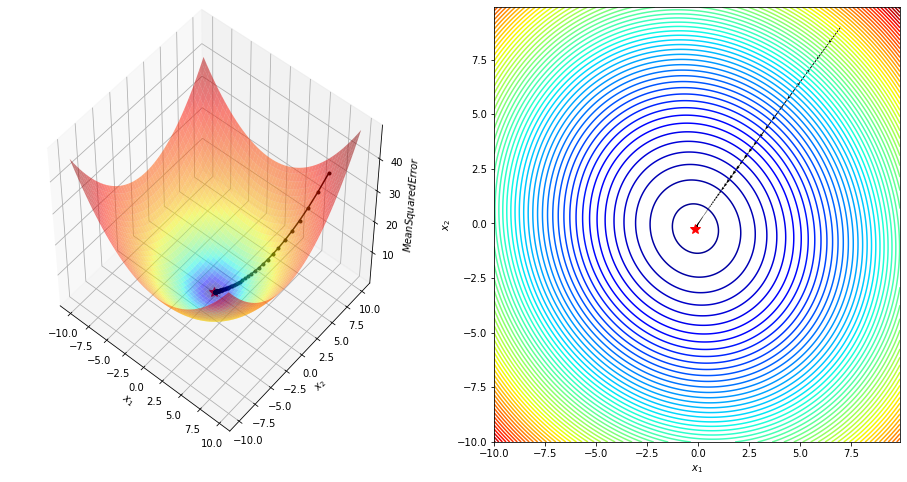

In [7]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## Adam

epoch	iter	cost		gap		rate
   0	   0	1.7639e-01	6.4672e-02			loss: 1.7639e-01 - r2: 0.7921
 100	 100	1.4187e-01	3.0146e-02	4.6614e-01	loss: 1.4187e-01 - r2: 0.7921
 200	 200	1.2373e-01	1.2009e-02	3.9835e-01	loss: 1.2373e-01 - r2: 0.7921
 300	 300	1.1577e-01	4.0468e-03	3.3699e-01	loss: 1.1577e-01 - r2: 0.7921
 400	 400	1.1284e-01	1.1193e-03	2.7658e-01	loss: 1.1284e-01 - r2: 0.7921
 500	 500	1.1197e-01	2.5200e-04	2.2515e-01	loss: 1.1197e-01 - r2: 0.7921
 600	 600	1.1177e-01	5.2279e-05	2.0745e-01	loss: 1.1177e-01 - r2: 0.7921
 700	 700	1.1174e-01	2.1506e-05	4.1137e-01	loss: 1.1174e-01 - r2: 0.7921
 800	 800	1.1172e-01	2.5938e-06	1.2061e-01	loss: 1.1172e-01 - r2: 0.7921
 900	 900	1.1172e-01	1.3696e-06	5.2803e-01	loss: 1.1172e-01 - r2: 0.7921

[ 14.9677928 -17.1923092]


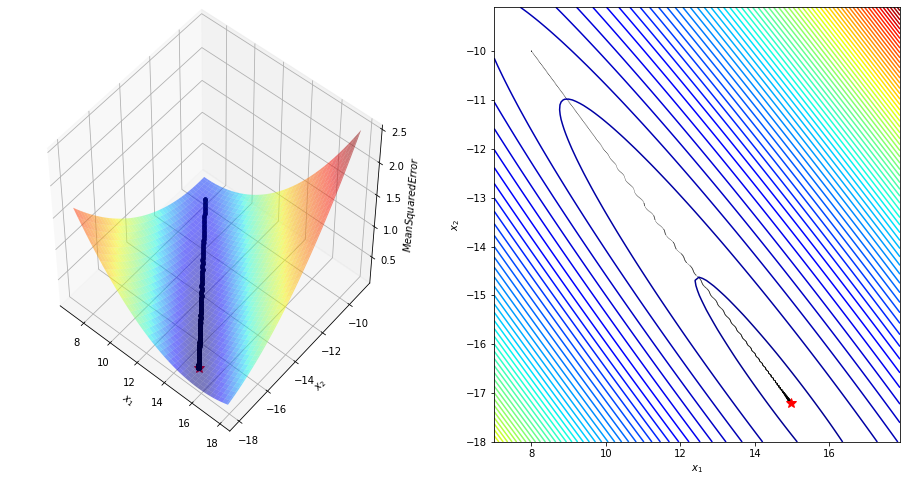

In [8]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	cost		gap		rate
   0	   0	3.3019e+01	3.2499e+01			loss: 3.3019e+01 - r2: 0.0586
 100	 100	5.2099e-01	5.9490e-04	1.8305e-05	loss: 5.2099e-01 - r2: 0.0586
 200	 200	5.2397e-01	3.5731e-03	6.0062e+00	loss: 5.2397e-01 - r2: 0.0586
 300	 300	5.2398e-01	3.5788e-03	1.0016e+00	loss: 5.2398e-01 - r2: 0.0586
 400	 400	5.2397e-01	3.5768e-03	9.9944e-01	loss: 5.2397e-01 - r2: 0.0586
 500	 500	5.2397e-01	3.5752e-03	9.9956e-01	loss: 5.2397e-01 - r2: 0.0586
 600	 600	5.2397e-01	3.5752e-03	9.9998e-01	loss: 5.2397e-01 - r2: 0.0586
 700	 700	5.2397e-01	3.5760e-03	1.0002e+00	loss: 5.2397e-01 - r2: 0.0586
 800	 800	5.2397e-01	3.5770e-03	1.0003e+00	loss: 5.2397e-01 - r2: 0.0586
 900	 900	5.2397e-01	3.5778e-03	1.0002e+00	loss: 5.2397e-01 - r2: 0.0586

[-0.07418876 -0.12507735]


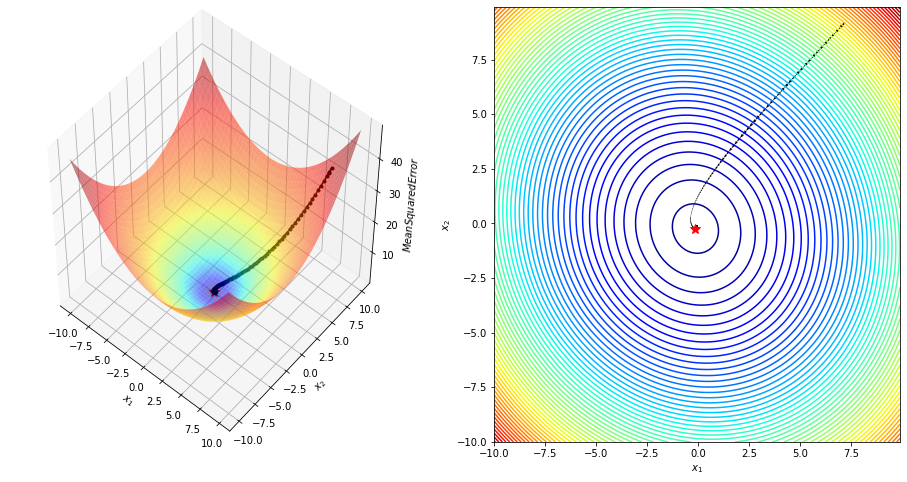

In [9]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaMax

epoch	iter	cost		gap		rate
   0	   0	1.7639e-01	6.4672e-02			loss: 1.7639e-01 - r2: 0.7921
 100	 100	1.3637e-01	2.4648e-02	3.8113e-01	loss: 1.3637e-01 - r2: 0.7921
 200	 200	1.2006e-01	8.3449e-03	3.3856e-01	loss: 1.2006e-01 - r2: 0.7921
 300	 300	1.1422e-01	2.4964e-03	2.9915e-01	loss: 1.1422e-01 - r2: 0.7921
 400	 400	1.1237e-01	6.4951e-04	2.6018e-01	loss: 1.1237e-01 - r2: 0.7921
 500	 500	1.1186e-01	1.4441e-04	2.2234e-01	loss: 1.1186e-01 - r2: 0.7921
 600	 600	1.1175e-01	2.6867e-05	1.8605e-01	loss: 1.1175e-01 - r2: 0.7921
 700	 700	1.1172e-01	4.0963e-06	1.5246e-01	loss: 1.1172e-01 - r2: 0.7921
 800	 800	1.1172e-01	4.9226e-07	1.2017e-01	loss: 1.1172e-01 - r2: 0.7921
 900	 900	1.1172e-01	5.3739e-08	1.0917e-01	loss: 1.1172e-01 - r2: 0.7921

[ 14.96917189 -17.1929367 ]


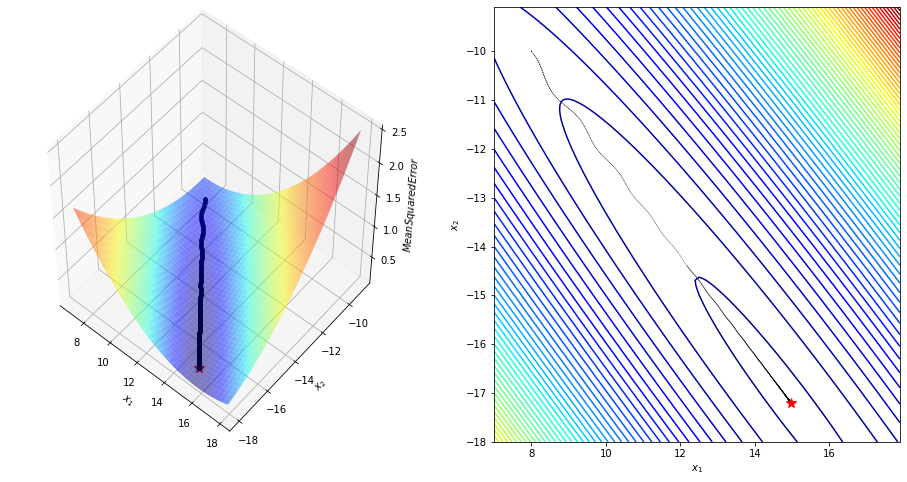

In [10]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.8, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	cost		gap		rate
   0	   0	3.3019e+01	3.2499e+01			loss: 3.3019e+01 - r2: 0.0586
 100	 100	6.1897e-01	9.8575e-02	3.0332e-03	loss: 6.1897e-01 - r2: 0.0586
 200	 200	5.2472e-01	4.3234e-03	4.3859e-02	loss: 5.2472e-01 - r2: 0.0586
 300	 300	5.2399e-01	3.5923e-03	8.3090e-01	loss: 5.2399e-01 - r2: 0.0586
 400	 400	5.2398e-01	3.5799e-03	9.9654e-01	loss: 5.2398e-01 - r2: 0.0586
 500	 500	5.2397e-01	3.5772e-03	9.9925e-01	loss: 5.2397e-01 - r2: 0.0586
 600	 600	5.2397e-01	3.5753e-03	9.9945e-01	loss: 5.2397e-01 - r2: 0.0586
 700	 700	5.2397e-01	3.5741e-03	9.9968e-01	loss: 5.2397e-01 - r2: 0.0586
 800	 800	5.2397e-01	3.5739e-03	9.9993e-01	loss: 5.2397e-01 - r2: 0.0586
 900	 900	5.2397e-01	3.5745e-03	1.0002e+00	loss: 5.2397e-01 - r2: 0.0586

[-0.07413601 -0.12516344]


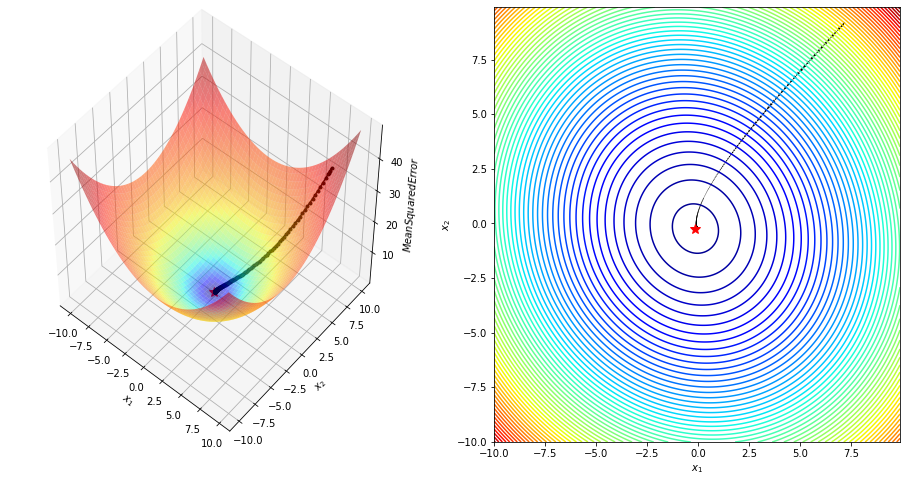

In [11]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AMSGrad

epoch	iter	cost		gap		rate
   0	   0	1.7639e-01	6.4672e-02			loss: 1.7639e-01 - r2: 0.7921
 100	 100	1.1200e-01	2.8497e-04	4.4064e-03	loss: 1.1200e-01 - r2: 0.7921
 200	 200	1.1180e-01	7.7884e-05	2.7331e-01	loss: 1.1180e-01 - r2: 0.7921
 300	 300	1.1173e-01	1.2735e-05	1.6351e-01	loss: 1.1173e-01 - r2: 0.7921
 400	 400	1.1172e-01	1.6083e-06	1.2629e-01	loss: 1.1172e-01 - r2: 0.7921
 500	 500	1.1172e-01	1.7957e-07	1.1166e-01	loss: 1.1172e-01 - r2: 0.7921
 600	 600	1.1172e-01	1.6382e-08	9.1224e-02	loss: 1.1172e-01 - r2: 0.7921
 700	 700	1.1172e-01	9.8319e-10	6.0018e-02	loss: 1.1172e-01 - r2: 0.7921
 800	 800	1.1172e-01	1.1214e-11	1.1406e-02	loss: 1.1172e-01 - r2: 0.7921
 900	 900	1.1172e-01	7.9096e-12	7.0530e-01	loss: 1.1172e-01 - r2: 0.7921

[ 14.97042516 -17.19470968]


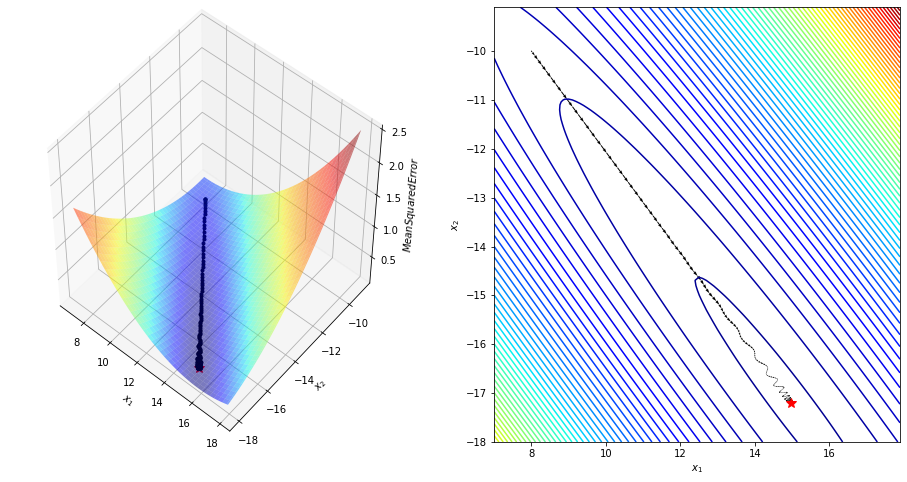

In [12]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	cost		gap		rate
   0	   0	3.3019e+01	3.2499e+01			loss: 3.3019e+01 - r2: 0.0586
 100	 100	5.2465e-01	4.2572e-03	1.3100e-04	loss: 5.2465e-01 - r2: 0.0586
 200	 200	5.2398e-01	3.5878e-03	8.4276e-01	loss: 5.2398e-01 - r2: 0.0586
 300	 300	5.2397e-01	3.5743e-03	9.9623e-01	loss: 5.2397e-01 - r2: 0.0586
 400	 400	5.2397e-01	3.5743e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 500	 500	5.2397e-01	3.5743e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 600	 600	5.2397e-01	3.5743e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 700	 700	5.2397e-01	3.5743e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 800	 800	5.2397e-01	3.5743e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 900	 900	5.2397e-01	3.5743e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586

[-0.07419817 -0.12515352]


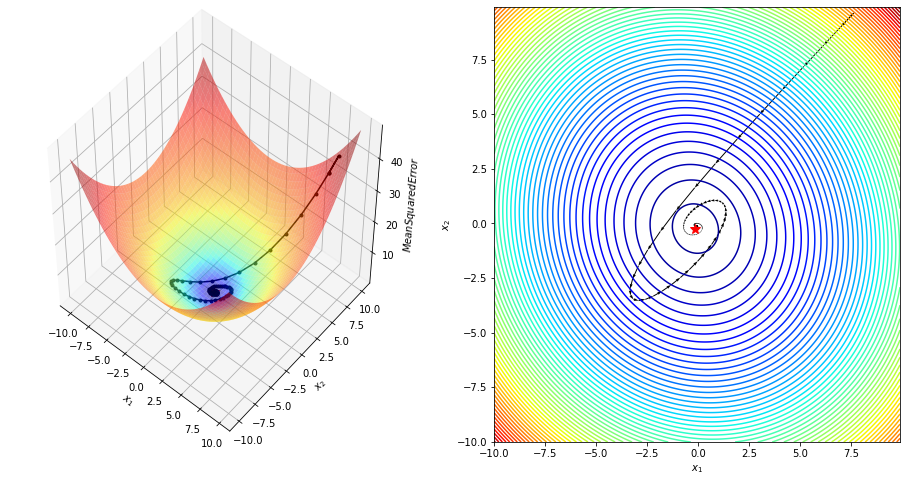

In [13]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaDelta

epoch	iter	cost		gap		rate
   0	   0	1.7639e-01	6.4672e-02			loss: 1.7639e-01 - r2: 0.7921
 100	 100	1.1180e-01	7.7746e-05	1.2022e-03	loss: 1.1180e-01 - r2: 0.7921
 200	 200	1.1172e-01	2.1936e-06	2.8215e-02	loss: 1.1172e-01 - r2: 0.7921
 300	 300	1.1172e-01	7.2700e-07	3.3142e-01	loss: 1.1172e-01 - r2: 0.7921
 400	 400	1.1172e-01	2.5344e-07	3.4861e-01	loss: 1.1172e-01 - r2: 0.7921
 500	 500	1.1172e-01	8.8385e-08	3.4874e-01	loss: 1.1172e-01 - r2: 0.7921
 600	 600	1.1172e-01	3.0824e-08	3.4875e-01	loss: 1.1172e-01 - r2: 0.7921
 700	 700	1.1172e-01	1.0750e-08	3.4875e-01	loss: 1.1172e-01 - r2: 0.7921
 800	 800	1.1172e-01	3.7490e-09	3.4875e-01	loss: 1.1172e-01 - r2: 0.7921
 900	 900	1.1172e-01	1.3075e-09	3.4875e-01	loss: 1.1172e-01 - r2: 0.7921

[ 14.97108372 -17.19528847]


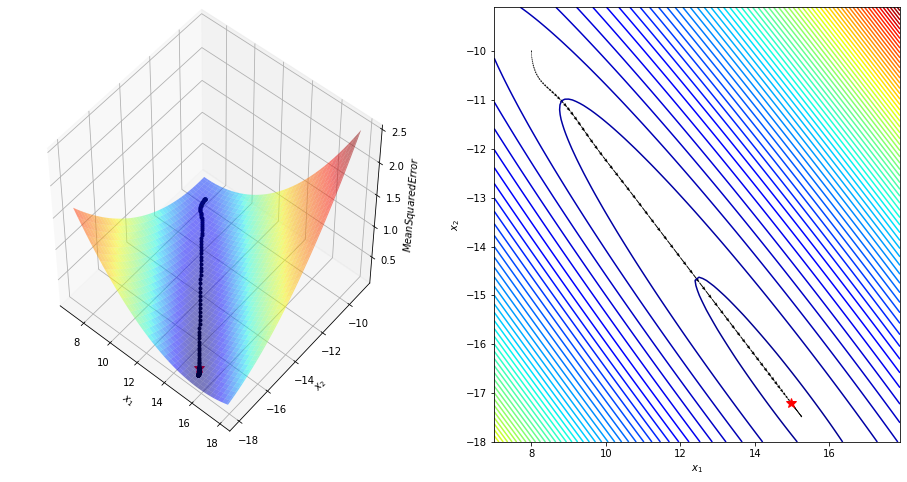

In [14]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.8, 
                             momentum_type='nesterov', momentum=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	cost		gap		rate
   0	   0	3.3019e+01	3.2499e+01			loss: 3.3019e+01 - r2: 0.0586
 100	 100	1.4454e+01	1.3933e+01	4.2874e-01	loss: 1.4454e+01 - r2: 0.0586
 200	 200	6.7185e+00	6.1981e+00	4.4484e-01	loss: 6.7185e+00 - r2: 0.0586
 300	 300	2.7657e+00	2.2453e+00	3.6226e-01	loss: 2.7657e+00 - r2: 0.0586
 400	 400	1.0271e+00	5.0671e-01	2.2567e-01	loss: 1.0271e+00 - r2: 0.0586
 500	 500	5.6501e-01	4.4615e-02	8.8049e-02	loss: 5.6501e-01 - r2: 0.0586
 600	 600	5.2401e-01	3.6092e-03	8.0896e-02	loss: 5.2401e-01 - r2: 0.0586
 700	 700	5.2397e-01	3.5770e-03	9.9109e-01	loss: 5.2397e-01 - r2: 0.0586
 800	 800	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 900	 900	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586

[-0.07415885 -0.12512038]


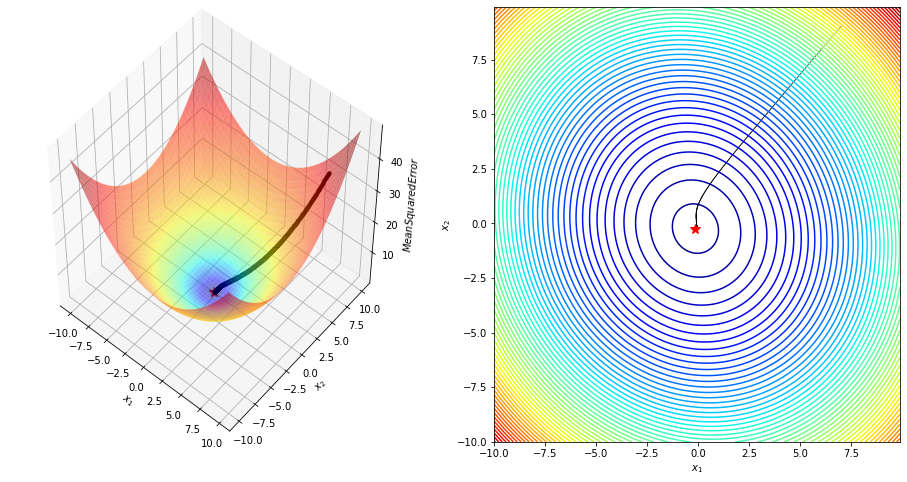

In [15]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## RProp

epoch	iter	cost		gap		rate
   0	   0	1.7639e-01	6.4672e-02			loss: 1.7639e-01 - r2: 0.7921
 100	 100	1.1328e-01	1.5625e-03	2.4160e-02	loss: 1.1328e-01 - r2: 0.7921
 200	 200	1.1172e-01	3.9347e-12	2.5183e-09	loss: 1.1172e-01 - r2: 0.7921
 300	 300	1.1172e-01	6.5821e-13	1.6728e-01	loss: 1.1172e-01 - r2: 0.7921
 400	 400	1.1172e-01	5.2483e-13	7.9736e-01	loss: 1.1172e-01 - r2: 0.7921
 500	 500	1.1172e-01	4.1214e-13	7.8529e-01	loss: 1.1172e-01 - r2: 0.7921
 600	 600	1.1172e-01	3.0800e-13	7.4732e-01	loss: 1.1172e-01 - r2: 0.7921
 700	 700	1.1172e-01	2.2454e-13	7.2903e-01	loss: 1.1172e-01 - r2: 0.7921
 800	 800	1.1172e-01	1.4969e-13	6.6663e-01	loss: 1.1172e-01 - r2: 0.7921
 900	 900	1.1172e-01	9.5479e-14	6.3786e-01	loss: 1.1172e-01 - r2: 0.7921

[ 14.97048663 -17.19469211]


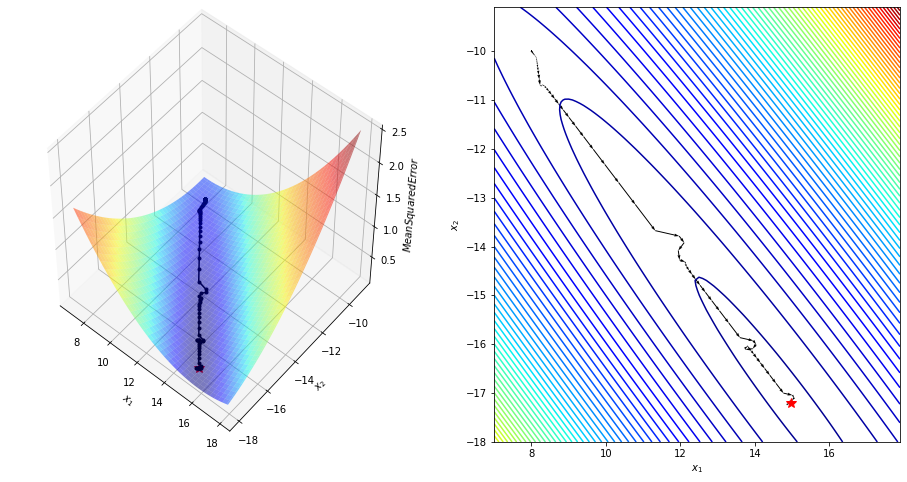

In [16]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.5, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	cost		gap		rate
   0	   0	3.3019e+01	3.2499e+01			loss: 3.3019e+01 - r2: 0.0586
 100	 100	5.2393e-01	3.5340e-03	1.0874e-04	loss: 5.2393e-01 - r2: 0.0586
 200	 200	5.2397e-01	3.5770e-03	1.0122e+00	loss: 5.2397e-01 - r2: 0.0586
 300	 300	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 400	 400	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 500	 500	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 600	 600	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 700	 700	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 800	 800	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586
 900	 900	5.2397e-01	3.5770e-03	1.0000e+00	loss: 5.2397e-01 - r2: 0.0586

[-0.074159   -0.12511986]


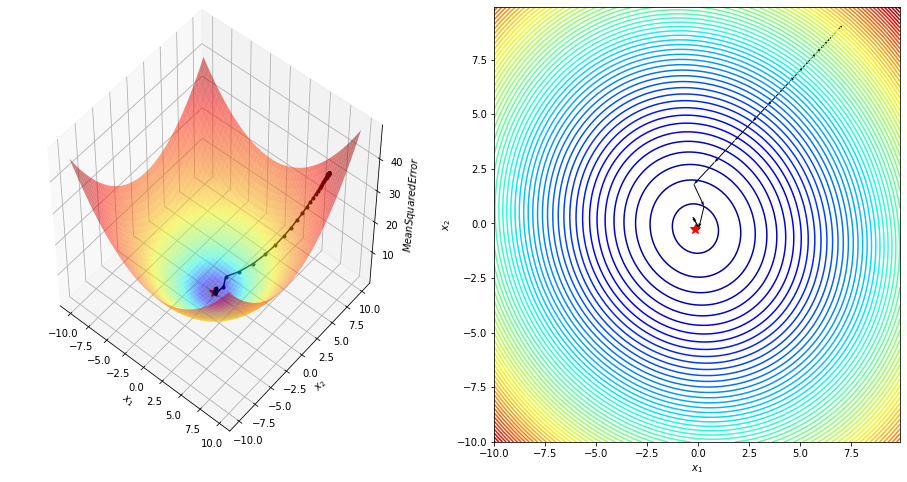

In [17]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## RMSProp

epoch	iter	cost		gap		rate
   0	   0	1.7639e-01	6.4672e-02			loss: 1.7639e-01 - r2: 0.7921
 100	 100	1.6936e-01	5.7643e-02	8.9132e-01	loss: 1.6936e-01 - r2: 0.7921
 200	 200	1.3703e-01	2.5307e-02	4.3902e-01	loss: 1.3703e-01 - r2: 0.7921
 300	 300	1.1752e-01	5.7974e-03	2.2908e-01	loss: 1.1752e-01 - r2: 0.7921
 400	 400	1.1175e-01	2.9905e-05	5.1584e-03	loss: 1.1175e-01 - r2: 0.7921
 500	 500	1.1172e-01	6.7621e-07	2.2612e-02	loss: 1.1172e-01 - r2: 0.7921
 600	 600	1.1172e-01	7.7632e-07	1.1481e+00	loss: 1.1172e-01 - r2: 0.7921
 700	 700	1.1172e-01	7.7785e-07	1.0020e+00	loss: 1.1172e-01 - r2: 0.7921
 800	 800	1.1172e-01	7.7787e-07	1.0000e+00	loss: 1.1172e-01 - r2: 0.7921
 900	 900	1.1172e-01	7.7787e-07	1.0000e+00	loss: 1.1172e-01 - r2: 0.7921

[ 14.96733359 -17.19783356]


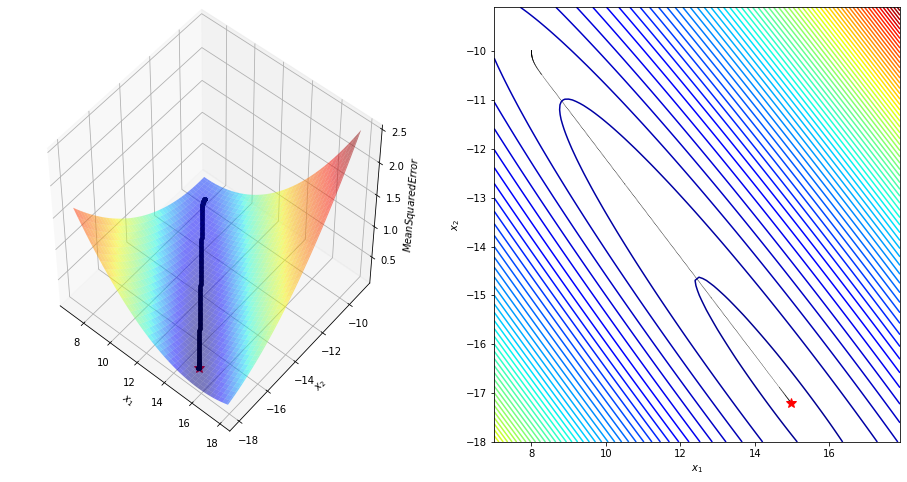

In [18]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	cost		gap		rate
   0	   0	3.3019e+01	3.2499e+01			loss: 3.3019e+01 - r2: 0.0586
 100	 100	5.2397e-01	3.5770e-03	1.1007e-04	loss: 5.2397e-01 - r2: 0.0586
 200	 200	5.2080e-01	4.0215e-04	1.1243e-01	loss: 5.2080e-01 - r2: 0.0586
 300	 300	5.2079e-01	3.9272e-04	9.7656e-01	loss: 5.2079e-01 - r2: 0.0586
 400	 400	5.2079e-01	3.9280e-04	1.0002e+00	loss: 5.2079e-01 - r2: 0.0586
 500	 500	5.2079e-01	3.9280e-04	1.0000e+00	loss: 5.2079e-01 - r2: 0.0586
 600	 600	5.2079e-01	3.9280e-04	1.0000e+00	loss: 5.2079e-01 - r2: 0.0586
 700	 700	5.2079e-01	3.9280e-04	1.0000e+00	loss: 5.2079e-01 - r2: 0.0586
 800	 800	5.2079e-01	3.9280e-04	1.0000e+00	loss: 5.2079e-01 - r2: 0.0586
 900	 900	5.2079e-01	3.9280e-04	1.0000e+00	loss: 5.2079e-01 - r2: 0.0586

[ 0.02571909 -0.02524244]


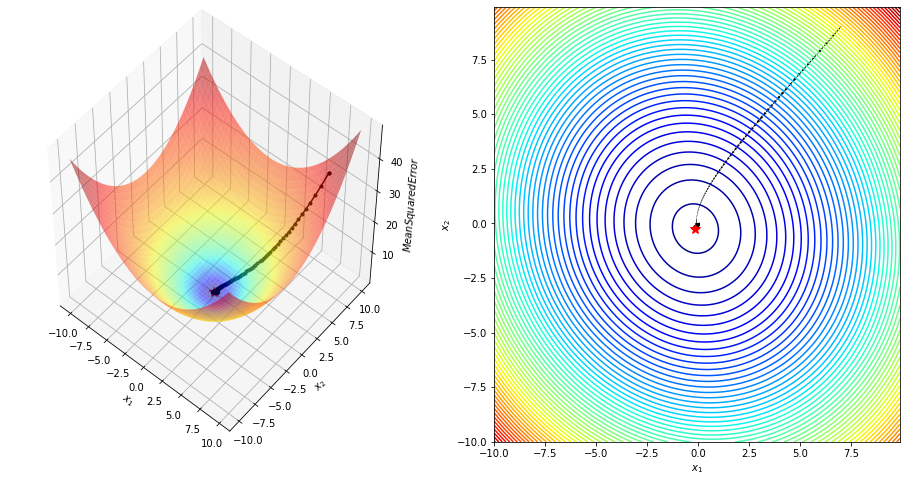

In [19]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)